<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Text-Mining-vs-NLP" data-toc-modified-id="Text-Mining-vs-NLP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Text Mining vs NLP</a></span><ul class="toc-item"><li><span><a href="#Text-Mining-분야" data-toc-modified-id="Text-Mining-분야-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Text Mining 분야</a></span></li></ul></li><li><span><a href="#Text-Mining-Process" data-toc-modified-id="Text-Mining-Process-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text Mining Process</a></span><ul class="toc-item"><li><span><a href="#데이터-로딩" data-toc-modified-id="데이터-로딩-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>데이터 로딩</a></span></li><li><span><a href="#단어빈보-분석" data-toc-modified-id="단어빈보-분석-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>단어빈보 분석</a></span></li><li><span><a href="#혐오표현-카테고리-중-한-가지를-선택해-단어-빈도-분석-진행" data-toc-modified-id="혐오표현-카테고리-중-한-가지를-선택해-단어-빈도-분석-진행-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>혐오표현 카테고리 중 한 가지를 선택해 단어 빈도 분석 진행</a></span></li><li><span><a href="#워드클라우드" data-toc-modified-id="워드클라우드-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>워드클라우드</a></span></li><li><span><a href="#데이터-클렌징" data-toc-modified-id="데이터-클렌징-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>데이터 클렌징</a></span></li><li><span><a href="#단어-연관성-분석" data-toc-modified-id="단어-연관성-분석-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>단어 연관성 분석</a></span></li><li><span><a href="#감성분석" data-toc-modified-id="감성분석-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>감성분석</a></span><ul class="toc-item"><li><span><a href="#감성분석-순서" data-toc-modified-id="감성분석-순서-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>감성분석 순서</a></span></li></ul></li><li><span><a href="#수치화" data-toc-modified-id="수치화-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>수치화</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>모델링</a></span></li></ul></li></ul></div>

### Text Mining vs NLP
- TextMining : 비정형 텍스트 데이터에서 의미있는 정보를 추출하는 방법
- NLP(자연어 처리) : 사람이 사용하는 언어를 이해하고 예측하는 분야

#### Text Mining 분야
- 문서 분류 : text가 특정 카테고리에 속하는지 예측하는 분야
- 문서 요약 : text의 주요내용을 추리는 분야
- 문서 군집분석 : 문서끼리의 유사도를 비교분석 하는 분야
- 감성 분석 : text에 들어있는 감정이나 의도를 분석하는 분야

### Text Mining Process
1. 텍스트 전처리
    - 클렌징 (대/소문자, 특수문자 삭제, 오탈자 제거 등)
    - 불용어처리 (stop words)
    - 어근추출 (Stemming/Lemmatization)
        - 영어 : NLTK
        - 한국어 : Konlpy
    - 토큰화 : test를 일정단위로 분해하는 작업
2. 수치화/피쳐 벡터화 : 토큰화된 글자를 일정규칙에 따라 숫자로 변경하여 학습 특성으로 추출하는 작업
    - 단순 언어의 빈도
    - BOW, Tf-idf (빈도기반의 수치화)
    - Word Embedding (워드임베딩)
3. ML/DL 학습 -> 예측 -> 평가

#### 데이터 로딩
- 한국어 혐오표현 데이터

In [3]:
import pandas as pd

In [4]:
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", delimiter="\t") # delimiter="\t" : 탭으로 구분

In [5]:
train.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


In [6]:
# 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


In [7]:
# 테스트데이터 로딩
test = pd.read_csv("./data/unsmile_valid_v1.0.tsv", delimiter="\t")

In [8]:
# 결측치 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      3737 non-null   object
 1   여성/가족   3737 non-null   int64 
 2   남성      3737 non-null   int64 
 3   성소수자    3737 non-null   int64 
 4   인종/국적   3737 non-null   int64 
 5   연령      3737 non-null   int64 
 6   지역      3737 non-null   int64 
 7   종교      3737 non-null   int64 
 8   기타 혐오   3737 non-null   int64 
 9   악플/욕설   3737 non-null   int64 
 10  clean   3737 non-null   int64 
 11  개인지칭    3737 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 350.5+ KB


#### 단어빈보 분석
- 워드카운트 : 단어의 빈도를 측정

In [9]:
text_train = train['문장']

In [10]:
text_train

0                                   일안하는 시간은 쉬고싶어서 그런게 아닐까
1        아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...
2        루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o  doin 진짜 띵...
3        홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...
4        아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...
                               ...                        
15000                                            께롱께롱께롱!!!
15001                                갱상도가아니라 홍어지 개좃같은 홍어년들
15002                             말레이시아랑 인도네시아 여자 존나 못생겼던데
15003                                링크도 안박고 가서 글 쓰자고 선동하네
15004    멸치가 틀딱 짜증나서 트러블나면 조직적으로 좀스럽게 보복함ex: 수건찜유도탄, 틀한...
Name: 문장, Length: 15005, dtype: object

In [11]:
# 토큰화 작업
# 띄어쓰기 중심으로 모든 문장을 자르는 행위
tmp = [doc.split(" ") for doc in text_train]
tmp

[['일안하는', '시간은', '쉬고싶어서', '그런게', '아닐까'],
 ['아동성범죄와',
  '페도버는',
  '기록바',
  '끊어져',
  '영원히',
  '고통',
  '받는다.',
  '무슬림',
  '50퍼',
  '근친이다.',
  '10',
  '16까지',
  'IQ',
  '떨어지고',
  '출산',
  '위험은',
  '400%',
  '다.'],
 ['루나',
  '솔로앨범',
  '나왔을',
  '때부터',
  '머모',
  '기운',
  '있었음',
  'ㅇㅇ',
  'Keep',
  'o',
  '',
  'doin',
  '진짜',
  '띵곡임',
  '꼭',
  '들어보셈"'],
 ['홍팍에도',
  '어버이연합인가',
  '보내요',
  '뭐',
  '이런뎃글',
  '있는데',
  '이거',
  '어버이연합측에',
  '신고하면',
  '그쪽에서',
  '고소',
  '가능하냐?'],
 ['아놔',
  '왜',
  '여기',
  '댓들은',
  '다',
  '여자들이',
  '김치녀라고',
  '먼저',
  '불렸다!',
  '여자들은',
  '더',
  '심하게',
  '그런다!',
  '이렇게',
  '2개로',
  '싸우냐..',
  '내가',
  '볼',
  '땐',
  '둘다',
  '나쁜',
  '말',
  '그',
  '이상도',
  '이하도',
  '아닌데'],
 ['고향가서',
  '피방가면',
  '동네',
  '부럴',
  '친구들이랑은',
  '뭐',
  '거르는',
  '거',
  '없이',
  '이야기하니까',
  '막',
  '말하게',
  '되더라',
  '당연히',
  '키보드를',
  '치거나',
  '그러지는',
  '않는데',
  '말하는게',
  '많이',
  '거칠어지긴',
  '해',
  '반성해야겠네'],
 ['예수',
  '십새끼',
  '개새끼',
  '창녀아들',
  '애비실종',
  '가정교육',
  '못받은',
  '무뇌충',
  '허언증',
  '정신병자',
  '사기꾼

In [12]:
# 하나의 리스트로 모아주기
token_list = []
for s in tmp:
    token_list += s

In [13]:
token_list

['일안하는',
 '시간은',
 '쉬고싶어서',
 '그런게',
 '아닐까',
 '아동성범죄와',
 '페도버는',
 '기록바',
 '끊어져',
 '영원히',
 '고통',
 '받는다.',
 '무슬림',
 '50퍼',
 '근친이다.',
 '10',
 '16까지',
 'IQ',
 '떨어지고',
 '출산',
 '위험은',
 '400%',
 '다.',
 '루나',
 '솔로앨범',
 '나왔을',
 '때부터',
 '머모',
 '기운',
 '있었음',
 'ㅇㅇ',
 'Keep',
 'o',
 '',
 'doin',
 '진짜',
 '띵곡임',
 '꼭',
 '들어보셈"',
 '홍팍에도',
 '어버이연합인가',
 '보내요',
 '뭐',
 '이런뎃글',
 '있는데',
 '이거',
 '어버이연합측에',
 '신고하면',
 '그쪽에서',
 '고소',
 '가능하냐?',
 '아놔',
 '왜',
 '여기',
 '댓들은',
 '다',
 '여자들이',
 '김치녀라고',
 '먼저',
 '불렸다!',
 '여자들은',
 '더',
 '심하게',
 '그런다!',
 '이렇게',
 '2개로',
 '싸우냐..',
 '내가',
 '볼',
 '땐',
 '둘다',
 '나쁜',
 '말',
 '그',
 '이상도',
 '이하도',
 '아닌데',
 '고향가서',
 '피방가면',
 '동네',
 '부럴',
 '친구들이랑은',
 '뭐',
 '거르는',
 '거',
 '없이',
 '이야기하니까',
 '막',
 '말하게',
 '되더라',
 '당연히',
 '키보드를',
 '치거나',
 '그러지는',
 '않는데',
 '말하는게',
 '많이',
 '거칠어지긴',
 '해',
 '반성해야겠네',
 '예수',
 '십새끼',
 '개새끼',
 '창녀아들',
 '애비실종',
 '가정교육',
 '못받은',
 '무뇌충',
 '허언증',
 '정신병자',
 '사기꾼',
 '망상',
 '근본없는',
 '병신',
 '장애인',
 '짱개',
 '흑인',
 '이슬람',
 '전라도랑',
 '동급',
 '나이쳐먹고',
 '피시방가는',
 '놈들은',
 '대가리에',


In [14]:
# 토큰 갯수세기
from collections import Counter

In [15]:
counter = Counter(token_list)

In [16]:
counter.most_common(40)
# () : 옵션 지정

[('다', 661),
 ('왜', 518),
 ('진짜', 514),
 ('ㅋㅋ', 401),
 ('존나', 370),
 ('더', 365),
 ('그냥', 357),
 ('ㅋㅋㅋ', 340),
 ('좀', 261),
 ('이', 243),
 ('그', 236),
 ('저', 234),
 ('씨발', 226),
 ('근데', 223),
 ('시발', 219),
 ('ㅋㅋㅋㅋ', 217),
 ('안', 177),
 ('하는', 171),
 ('난', 170),
 ('수', 169),
 ('새끼들', 166),
 ('저런', 165),
 ('또', 154),
 ('무슨', 153),
 ('아니라', 146),
 ('내가', 145),
 ('하고', 145),
 ('', 141),
 ('있는', 140),
 ('전라도', 139),
 ('ㄹㅇ', 138),
 ('너무', 136),
 ('잘', 134),
 ('뭐', 132),
 ('이런', 132),
 ('이기야', 128),
 ('여자', 125),
 ('ㅋ', 125),
 ('ㅋㅋㅋㅋㅋ', 124),
 ('보면', 123)]

#### 혐오표현 카테고리 중 한 가지를 선택해 단어 빈도 분석 진행

In [17]:
# 불리언 인덱싱 진행
data_지역 = train[train['지역']==1]
data_지역

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
6,예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...,0,0,0,1,0,1,1,1,0,0,0
25,홍어무침 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,0,0,0,0,0,1,0,0,0,0,0
28,홍들 피들 폭들 ㅎㅎㅎ,0,0,0,0,0,1,0,0,0,0,0
35,이새끼 전라도,0,0,0,0,0,1,0,0,0,0,0
37,진짜 전라도 존나 싫다,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14956,경상도새끼네,0,0,0,0,0,1,0,0,0,0,0
14975,7시말은 왜이렇게 듣기가 싫냐. 식당 같은데 가서도 전라도 말 들리면 신경 엄청 곤...,0,0,0,0,0,1,0,0,0,0,0
14979,왜 재밌겠는데 뭘 섬라도 쪽 꿀잼뉴스 공중제비하고 보겠네,0,0,0,0,0,1,0,0,0,0,0
14998,전라디언은 뇌구조가 다르게 태어난당께,0,0,0,0,0,1,0,0,0,0,0


In [18]:
data_지역_문장 = data_지역['문장']

In [19]:
data_지역_문장 = [t for doc in data_지역_문장 
                      for t in doc.split(" ")
                 ]
data_지역_문장

['예수',
 '십새끼',
 '개새끼',
 '창녀아들',
 '애비실종',
 '가정교육',
 '못받은',
 '무뇌충',
 '허언증',
 '정신병자',
 '사기꾼',
 '망상',
 '근본없는',
 '병신',
 '장애인',
 '짱개',
 '흑인',
 '이슬람',
 '전라도랑',
 '동급',
 '홍어무침',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '홍들',
 '피들',
 '폭들',
 'ㅎㅎㅎ',
 '이새끼',
 '전라도',
 '진짜',
 '전라도',
 '존나',
 '싫다',
 '전라도피는',
 '물보다',
 '진하다',
 '이거',
 'jtbc나',
 '한경오에',
 '제보하면',
 '댓글로',
 '대구',
 '개까이겠지?',
 '대구븅신들',
 '가까운',
 '신안으로',
 '보낸다.',
 '세상',
 '그',
 '누구도',
 '찾지못한다',
 '전라도세끼들은',
 '딱봐도',
 '뭔가',
 '혐오감있게',
 '생김',
 '유전자가',
 '다른',
 '종족인건',
 '확실함',
 '인천은',
 '진짜',
 '수도권인데',
 '제일',
 '싼듯',
 '요즘',
 '안산부천',
 '이딴',
 '쓰레기동네',
 '다오르는데',
 '인천은',
 '방어하는듯',
 '경상도친구장점내가',
 '존나',
 '지적하고',
 '꼽주고해도',
 '다들어줌',
 '근대',
 '7시는',
 '전두환각하가',
 '미워서',
 '그러는거냐?',
 '아니면',
 '진심으로',
 '머중이를',
 '존경하는거냐?존나',
 '궁금함',
 'ㅇㅈ',
 '짱구',
 '드래곤볼',
 '심지어지금도',
 '넷플에서',
 '애니보면서',
 '반일하는',
 '절라도는',
 '자살',
 'ㄱ',
 '대구게이는',
 '일베',
 '글쓰지',
 '마라',
 'IP타고',
 '우한폐렴',
 '전파된다',
 '그래서',
 '신도시',
 '맘충년들이',
 '유독',
 '진성맘충년들인데',
 '그',
 '중에서도',
 '맘충대장이',
 '동탄맘년들임.',
 '라도도',
 '쌍도를',
 '부라워함',
 '우린',
 '전라도'

In [20]:
counter = Counter(data_지역_문장)

In [21]:
counter.most_common(40)

[('전라도', 130),
 ('홍어', 48),
 ('존나', 40),
 ('진짜', 39),
 ('경상도', 38),
 ('새끼들', 33),
 ('다', 33),
 ('ㅋㅋㅋ', 30),
 ('ㅋㅋ', 29),
 ('전라도는', 27),
 ('쌍도', 26),
 ('더', 26),
 ('=', 25),
 ('개쌍도', 20),
 ('왜', 19),
 ('씨발', 19),
 ('시발', 18),
 ('서울', 18),
 ('그', 17),
 ('ㄹㅇ', 16),
 ('이', 15),
 ('전라도가', 15),
 ('사는', 15),
 ('저', 14),
 ('역시', 14),
 ('.', 14),
 ('제일', 13),
 ('라도', 13),
 ('홍어들', 13),
 ('그냥', 13),
 ('대구', 12),
 ('일베', 12),
 ('홍어가', 12),
 ('보면', 12),
 ('+', 12),
 ('있는', 11),
 ('좀', 11),
 ('뭐', 11),
 ('홍어새끼들', 10),
 ('전라도에', 10)]

#### 워드클라우드

In [22]:
!pip install wordcloud

In [23]:
from wordcloud import WordCloud # 워드클라우드 클래스

In [24]:
# 객체생성
wc = WordCloud(background_color = 'white',
               font_path="C:\\Windows\\Fonts\\malgun.ttf",
              random_state=425)

In [25]:
# 워드클라우드 생성
input_str = " ".join(data_지역_문장)  # 토큰을 띄어쓰기를 이용해 묶어줌
result_cloud = wc.generate_from_text(input_str)

In [26]:
import matplotlib.pyplot as plt

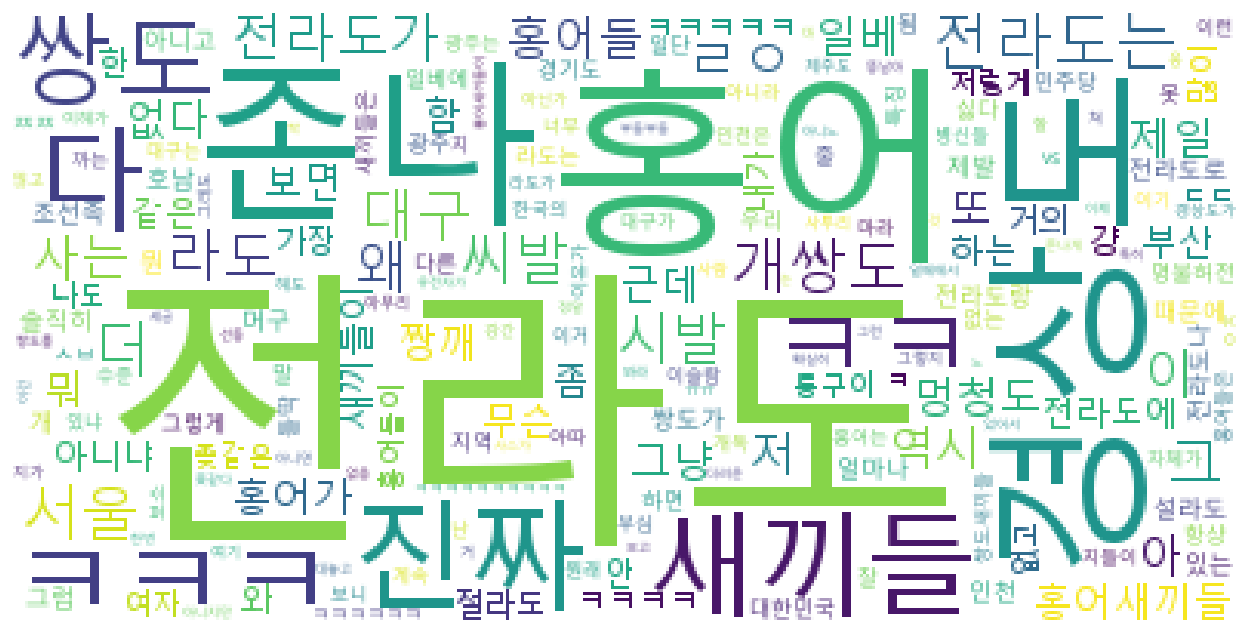

In [27]:
plt.figure(figsize=(20, 8))  # 가로, 세로
plt.imshow(result_cloud)  # 워드클라우드 그림그리기
plt.axis('off')  # x축, y축 없애기
plt.savefig('./word_cloud.png')
plt.show()

#### 데이터 클렌징
- 한 글자 단어 삭제 (text mining에서 의미 부여가 어려움)
- ㅋㅋㅋ, ㅎㅎㅎ 같은 반복적인 글자 삭제

In [28]:
import re  # 정규표현식

In [29]:
# 패턴 생성
p = re.compile("[ㅋㅎㄷ~ㅡ>!]+")  # 정규표현식 패턴
# [] : 여러 개를 포함할 때 각각의 문자들을 걸러낼 때 사용
# + : 문자가 한 글자 이상일 때 ex) ㅋ, ㅋㅋ, ㅋㅋㅋ 연속적으로 반복되는 문자를 뜻함

In [30]:
clean_text = []  # 전처리된 결과가 들어갈 리스트
# 한 글자 단어 삭제
for token in data_지역_문장:
    if len(token) < 2:  # 1글자 제거
        continue
    if p.match(token):  # 정규표현식에 매칭되는 글자 제거
        continue
    clean_text.append(token)  # 나머지 정상 토큰을 리스트에 등록
        

In [31]:
# 워드클라우드 생성
input_str = " ".join(data_지역_문장)  # 토큰을 띄어쓰기를 이용해 묶어줌
result_cloud = wc.generate_from_text(input_str)

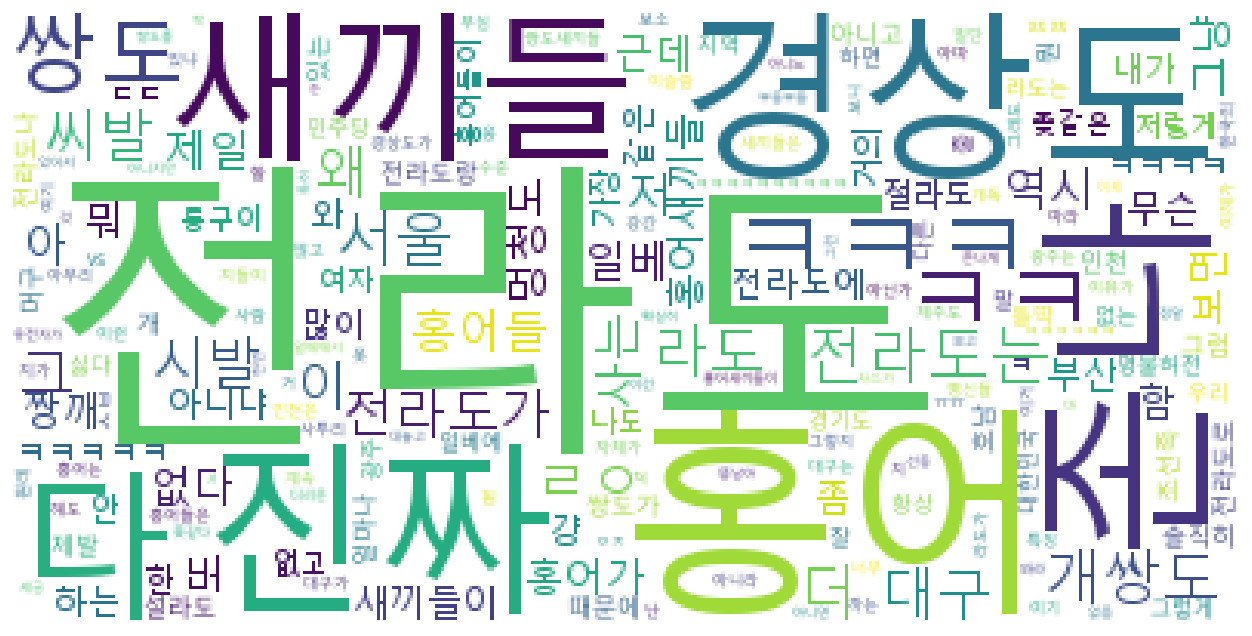

In [32]:
plt.figure(figsize=(20, 8))  # 가로, 세로
plt.imshow(result_cloud)  # 워드클라우드 그림그리기
plt.axis('off')  # x축, y축 없애기
plt.savefig('./word_cloud.png')
plt.show()

#### 단어 연관성 분석
- 딥러닝 기반으로 단어간의 연관성(유사도)를 분석하는 모델
- word2vec : 문장에서 인접된 단어(토큰)끼리는 서로 관련이 있다

In [31]:
# !pip install gensim

In [33]:
from gensim.models import Word2Vec

In [33]:
w2v = Word2Vec(window=3,  # 인접된 단어의 영역을 결정하는 수 
              min_count=5,  # 학습단어로 설정하기 위한 최소 등장 횟수 
              sg=1,
              vector_size=50,
              sentences=[doc.split(" ") for doc in data_지역_문장])  # 학습시킬 문장

In [34]:
# 연관성이 높은 단어 보여줌(관련성)
w2v.wv.most_similar("새끼들")

[('많고', 0.3885710835456848),
 ('새끼들은', 0.3328035771846771),
 ('아따', 0.30031394958496094),
 ('지', 0.27532118558883667),
 ('제일', 0.2679986357688904),
 ('머구', 0.26531782746315),
 ('못', 0.24532946944236755),
 ('대구는', 0.21961058676242828),
 ('아니라', 0.2138720154762268),
 ('대구가', 0.20520129799842834)]

#### 감성분석
- 혐오표현 : 0 / 악플&욕설 : 1 / clean : 2

In [35]:
train['혐오표현'] = train.loc[:,"여성/가족":"기타 혐오"].sum(axis=1)

In [36]:
train.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,혐오표현
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0,1
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0,1


In [37]:
train2 = train[['문장', '혐오표현', '악플/욕설', 'clean']]

In [38]:
# 정답 라벨링을 위한 사용자 정의함수
def label(row):
    if row['혐오표현'] >0:
        return 0
    elif row['악플/욕설'] > 0:
        return 1
    else :
        return 2

In [39]:
y_train = train2.apply(label, axis=1)
y_train

0        2
1        0
2        2
3        2
4        0
        ..
15000    2
15001    0
15002    0
15003    1
15004    0
Length: 15005, dtype: int64

In [40]:
test['혐오표현'] = test.loc[:,"여성/가족":"기타 혐오"].sum(axis=1)

In [41]:
test2 = train[['문장', '혐오표현', '악플/욕설', 'clean']]

In [42]:
y_test = test2.apply(label, axis=1)
y_test

0        2
1        0
2        2
3        2
4        0
        ..
15000    2
15001    0
15002    0
15003    1
15004    0
Length: 15005, dtype: int64

In [43]:
text_train = train2['문장']
text_test = test2['문장']

##### 감성분석 순서
(문제정의)-(수집)-전처리-토큰화-수치화-학습-예측-평가

In [44]:
# 형태소 추출
!pip install konlpy

In [45]:
from konlpy.tag import Okt

In [46]:
my_okt = Okt()  # 형태소분석기 객체 생성

In [47]:
# 형태소 단위로 분리
my_okt.morphs("아버지가 가방에 들어가신다")

['아버지', '가', '가방', '에', '들어가신다']

In [48]:
# 품사 판별
my_okt.pos("아버지가 가방에 들어가신다")

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]

In [49]:
my_okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [50]:
from konlpy.tag import Kkma

In [51]:
my_kkma = Kkma()

In [52]:
my_kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [53]:
# 반복 작업을 시각화 시켜주는 도구
from tqdm import tqdm

In [54]:
train_morphs = []  #훈련용 리스트
for txt in tqdm(text_train) : # 훈련용 문장을 반복
    morphs = my_okt.morphs(txt)  # 각 문장을 형태소 단위로 분리
    train_morphs.append(morphs)

100%|███████████████████████████████████████████████████████████████████████████| 15005/15005 [00:43<00:00, 344.72it/s]


In [55]:
test_morphs = []  #훈련용 리스트
for txt in tqdm(text_test) : # 훈련용 문장을 반복
    morphs = my_okt.morphs(txt)  # 각 문장을 형태소 단위로 분리
    test_morphs.append(morphs)

100%|███████████████████████████████████████████████████████████████████████████| 15005/15005 [00:56<00:00, 264.00it/s]


In [56]:
train_morphs

[['일안하는', '시간', '은', '쉬고싶어서', '그런게', '아닐까'],
 ['아동',
  '성범죄',
  '와',
  '페도버',
  '는',
  '기록',
  '바',
  '끊어져',
  '영원히',
  '고통',
  '받는다',
  '.',
  '무슬림',
  '50',
  '퍼',
  '근',
  '친',
  '이다',
  '.',
  '10',
  '16',
  '까지',
  'IQ',
  '떨어지고',
  '출산',
  '위험',
  '은',
  '400%',
  '다',
  '.'],
 ['루나',
  '솔로',
  '앨범',
  '나왔을',
  '때',
  '부터',
  '머모',
  '기운',
  '있었음',
  'ㅇㅇ',
  'Keep',
  'o',
  'doin',
  '진짜',
  '띵곡임',
  '꼭',
  '들어',
  '보셈',
  '"'],
 ['홍팍',
  '에도',
  '어버이연합',
  '인가',
  '보내요',
  '뭐',
  '이런',
  '뎃글',
  '있는데',
  '이',
  '거',
  '어버이연합',
  '측',
  '에',
  '신고',
  '하면',
  '그',
  '쪽',
  '에서',
  '고소',
  '가능하냐',
  '?'],
 ['아',
  '놔',
  '왜',
  '여기',
  '댓',
  '들',
  '은',
  '다',
  '여자',
  '들',
  '이',
  '김치',
  '녀',
  '라고',
  '먼저',
  '불렸다',
  '!',
  '여자',
  '들',
  '은',
  '더',
  '심하게',
  '그런다',
  '!',
  '이렇게',
  '2',
  '개',
  '로',
  '싸우냐',
  '..',
  '내',
  '가',
  '볼',
  '땐',
  '둘다',
  '나쁜',
  '말',
  '그',
  '이상',
  '도',
  '이하',
  '도',
  '아닌데'],
 ['고',
  '향가',
  '서',
  '피방',
  '가면',
  '동네',
  '부럴',
 

In [57]:
# 한글자 제거 및 정규표현식 활용 불필요한 토큰 삭제
import re # 정규표현식
p = re.compile("[ㅋㅇㅎㄷ~ㅡ>!.?,0-9a-z]+")  # 정규표현식 패턴

In [58]:
clean_text_train = []  # 전처리된 결과가 들어갈 리스트
# 한 글자 단어 삭제
for sentence in tqdm(train_morphs):  # 한 문장씩 꺼내오는 반복문
    tmp = []
    for token in sentence :   # 형태소 단위로 쪼개진 토큰을 반복
        if len(token) < 2:  # 1글자 제거
            continue
        if p.match(token):  # 정규표현식에 매칭되는 글자 제거
            continue
        tmp.append(token)  # 나머지 정상 토큰을 리스트에 등록
    clean_text_train.append(tmp)

100%|████████████████████████████████████████████████████████████████████████| 15005/15005 [00:00<00:00, 192107.97it/s]


In [59]:
clean_text_train

[['일안하는', '시간', '쉬고싶어서', '그런게', '아닐까'],
 ['아동',
  '성범죄',
  '페도버',
  '기록',
  '끊어져',
  '영원히',
  '고통',
  '받는다',
  '무슬림',
  '이다',
  '까지',
  'IQ',
  '떨어지고',
  '출산',
  '위험'],
 ['루나',
  '솔로',
  '앨범',
  '나왔을',
  '부터',
  '머모',
  '기운',
  '있었음',
  'Keep',
  '진짜',
  '띵곡임',
  '들어',
  '보셈'],
 ['홍팍',
  '에도',
  '어버이연합',
  '인가',
  '보내요',
  '이런',
  '뎃글',
  '있는데',
  '어버이연합',
  '신고',
  '하면',
  '에서',
  '고소',
  '가능하냐'],
 ['여기',
  '여자',
  '김치',
  '라고',
  '먼저',
  '불렸다',
  '여자',
  '심하게',
  '그런다',
  '이렇게',
  '싸우냐',
  '둘다',
  '나쁜',
  '이상',
  '이하',
  '아닌데'],
 ['향가',
  '피방',
  '가면',
  '동네',
  '부럴',
  '친구',
  '이랑은',
  '거르',
  '없이',
  '이야기',
  '하니까',
  '하게',
  '되더라',
  '당연히',
  '보드',
  '치거나',
  '그러지는',
  '않는데',
  '하는게',
  '많이',
  '거칠어지긴',
  '반성',
  '해야겠네'],
 ['예수',
  '새끼',
  '개새끼',
  '창녀',
  '아들',
  '애비',
  '실종',
  '가정교육',
  '받은',
  '무뇌충',
  '허언증',
  '정신병',
  '사기꾼',
  '망상',
  '근본',
  '없는',
  '병신',
  '장애인',
  '짱개',
  '흑인',
  '이슬람',
  '전라도'],
 ['나이', '먹고', '피시방', '가는', '대가리', '만찬', '들임'],
 ['출산',
  '같은',
  '소리',
  '하네

In [60]:
clean_text_test = []  # 전처리된 결과가 들어갈 리스트
# 한 글자 단어 삭제
for sentence in tqdm(train_morphs):  # 한 문장씩 꺼내오는 반복문
    tmp = []
    for token in sentence :   # 형태소 단위로 쪼개진 토큰을 반복
        if len(token) < 2:  # 1글자 제거
            continue
        if p.match(token):  # 정규표현식에 매칭되는 글자 제거
            continue
        tmp.append(token)  # 나머지 정상 토큰을 리스트에 등록
    clean_text_test.append(tmp)

100%|████████████████████████████████████████████████████████████████████████| 15005/15005 [00:00<00:00, 139101.26it/s]


In [61]:
clean_text_test

[['일안하는', '시간', '쉬고싶어서', '그런게', '아닐까'],
 ['아동',
  '성범죄',
  '페도버',
  '기록',
  '끊어져',
  '영원히',
  '고통',
  '받는다',
  '무슬림',
  '이다',
  '까지',
  'IQ',
  '떨어지고',
  '출산',
  '위험'],
 ['루나',
  '솔로',
  '앨범',
  '나왔을',
  '부터',
  '머모',
  '기운',
  '있었음',
  'Keep',
  '진짜',
  '띵곡임',
  '들어',
  '보셈'],
 ['홍팍',
  '에도',
  '어버이연합',
  '인가',
  '보내요',
  '이런',
  '뎃글',
  '있는데',
  '어버이연합',
  '신고',
  '하면',
  '에서',
  '고소',
  '가능하냐'],
 ['여기',
  '여자',
  '김치',
  '라고',
  '먼저',
  '불렸다',
  '여자',
  '심하게',
  '그런다',
  '이렇게',
  '싸우냐',
  '둘다',
  '나쁜',
  '이상',
  '이하',
  '아닌데'],
 ['향가',
  '피방',
  '가면',
  '동네',
  '부럴',
  '친구',
  '이랑은',
  '거르',
  '없이',
  '이야기',
  '하니까',
  '하게',
  '되더라',
  '당연히',
  '보드',
  '치거나',
  '그러지는',
  '않는데',
  '하는게',
  '많이',
  '거칠어지긴',
  '반성',
  '해야겠네'],
 ['예수',
  '새끼',
  '개새끼',
  '창녀',
  '아들',
  '애비',
  '실종',
  '가정교육',
  '받은',
  '무뇌충',
  '허언증',
  '정신병',
  '사기꾼',
  '망상',
  '근본',
  '없는',
  '병신',
  '장애인',
  '짱개',
  '흑인',
  '이슬람',
  '전라도'],
 ['나이', '먹고', '피시방', '가는', '대가리', '만찬', '들임'],
 ['출산',
  '같은',
  '소리',
  '하네

#### 수치화
- BOW, Tf-idf
- BOW(bag of word) : 문장에서 특정 단어의 등장 빈도를 수치화하는 방법
    - 단점 : 문장에서 단어의 순서를 고려하지 않는다
    - 단점 : 구축된 단어사전의 크기에 비례해서 문장의 부피가 커진다

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
sample_text = ['나는 오늘 점심에 한솥을 먹었다.',
              '너 저녁에 집들이 갈거야?',
              '나는 오늘 저녁에 운동하러 갈거야 BaBo',
              '좋겠다. 나는 저녁에 야간 자율학습 하러 갈건데....']

In [64]:
# BOW 객체 생성
sample_cv = CountVectorizer()

In [65]:
# 단어사전 구축
# 띄어쓰기 중심으로 토큰화를 하도록 설계
# 한 글자 단어는 등록하지 x
# 영어 대문자는 소문자로 변형
sample_cv.fit(sample_text)

CountVectorizer()

In [66]:
# 단어사전 확인
sample_cv.vocabulary_

{'나는': 3,
 '오늘': 6,
 '점심에': 10,
 '한솥을': 14,
 '먹었다': 4,
 '저녁에': 9,
 '집들이': 12,
 '갈거야': 1,
 '운동하러': 7,
 'babo': 0,
 '좋겠다': 11,
 '야간': 5,
 '자율학습': 8,
 '하러': 13,
 '갈건데': 2}

In [67]:
# 단어사전을 기반으로 빈도를 세서 수치화
result = sample_cv.transform(sample_text)

In [68]:
# 압축된 형태로 표기
result

<4x15 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [69]:
# 실제로는 사용 x
result.toarray()

array([[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]], dtype=int64)

In [70]:
# 실제데이터에 적용
unsmile_cv = CountVectorizer(stop_words=["으로", "이다", "하고", "부터"], # 불용어 등록
                            ngram_range=(1,1),  # n-gram 설정
                            max_df = 0.9,  # 최대 등장 빈도
                            min_df = 10  # 최소 등장 빈도
                            )  

In [71]:
# CountVectorizer가 내부적으로 토큰화를 진행
# 형태소 단위로 쪼개진 데이터를 띄어쓰기를 이용해 묶어줄 필요가 있음
clean_text_train2 = []
for txt in clean_text_train:  # 훈련용 데이터 반복
    clean_text_train2.append(" ".join(txt))
clean_text_train2[:5]

['일안하는 시간 쉬고싶어서 그런게 아닐까',
 '아동 성범죄 페도버 기록 끊어져 영원히 고통 받는다 무슬림 이다 까지 IQ 떨어지고 출산 위험',
 '루나 솔로 앨범 나왔을 부터 머모 기운 있었음 Keep 진짜 띵곡임 들어 보셈',
 '홍팍 에도 어버이연합 인가 보내요 이런 뎃글 있는데 어버이연합 신고 하면 에서 고소 가능하냐',
 '여기 여자 김치 라고 먼저 불렸다 여자 심하게 그런다 이렇게 싸우냐 둘다 나쁜 이상 이하 아닌데']

In [72]:
clean_text_test2 = []
for txt in clean_text_train:  # 훈련용 데이터 반복
    clean_text_test2.append(" ".join(txt))

In [73]:
unsmile_cv.fit(clean_text_train2)
# 기준은 훈련용만 하므로 train만 진행

CountVectorizer(max_df=0.9, min_df=10, stop_words=['으로', '이다', '하고', '부터'])

In [74]:
# 사용하는 단어 사전의 수 확인
len(unsmile_cv.vocabulary_)

2153

In [75]:
transform_X_train = unsmile_cv.transform(clean_text_train2)
transform_X_test = unsmile_cv.transform(clean_text_train2)

In [76]:
transform_X_train

<15005x2153 sparse matrix of type '<class 'numpy.int64'>'
	with 82177 stored elements in Compressed Sparse Row format>

In [77]:
transform_X_test

<15005x2153 sparse matrix of type '<class 'numpy.int64'>'
	with 82177 stored elements in Compressed Sparse Row format>

#### 모델링

In [35]:
# LogisticRegression 모델을 활용해서 학습 -> 예측 -> 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [79]:
logi = LogisticRegression()
score = cross_val_score(logi, transform_X_train, y_train, cv = 3).mean()

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [80]:
# 교차검증
score

0.6815065082412013

In [34]:
# 하이퍼 파라미터 튜닝
# CountVectorizer와 LogisticRegression 모델을 튜닝해보자
# 두 개를 묶어서 튜닝하도록 파이프라인 구성
# 파이프라인 : 로딩 -> 결측치 -> 스케일링 -> 토큰화/수치화 -> 학습
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [97]:
unsmile_pipeline = Pipeline([
    ('unsmile_cv', CountVectorizer(stop_words=["으로", "이다", "하고", "부터"])),
    ('unsmile_logi', LogisticRegression())
])

In [101]:
grid_params = {
    "unsmile_cv__max_df" : [0.9, 0.85, 0.8],
    "unsmile_cv__min_df" : [3,5,7,10],
    "unsmile_cv__ngram_range" : [(1, 1), (1, 2), (1, 3)],
    "unsmile_logi__C" : [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}

In [102]:
grid = GridSearchCV(unsmile_pipeline, grid_params, cv=3, n_jobs=-1)

In [103]:
grid.fit(clean_text_train2, y_train)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('unsmile_cv',
                                        CountVectorizer(stop_words=['으로', '이다',
                                                                    '하고',
                                                                    '부터'])),
                                       ('unsmile_logi', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'unsmile_cv__max_df': [0.9, 0.85, 0.8],
                         'unsmile_cv__min_df': [3, 5, 7, 10],
                         'unsmile_cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'unsmile_logi__C': [10000, 1000, 100, 10, 1, 0.1, 0.01,
                                             0.001, 0.0001]})

In [104]:
grid.best_params_

{'unsmile_cv__max_df': 0.9,
 'unsmile_cv__min_df': 3,
 'unsmile_cv__ngram_range': (1, 1),
 'unsmile_logi__C': 1}

In [105]:
best_model = grid.best_estimator_

In [106]:
best_model.score(clean_text_test2, y_test)

0.9090303232255915

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, best_model.predict(clean_text_test2)))

NameError: name 'y_test' is not defined

#### 모델저장

In [1]:
import pickle # 파이썬에 존재하는 모든 데이터 타입을 파일로 저장

In [113]:
with open("./unsmile_model.pkl", 'wb') as f : # 쓰기 모드로 파일 스트링 오픈
    pickle.dump(best_model, f) # 모델객체를 파일에 저장

#### 모델로딩

In [2]:
with open("./unsmile_model.pkl", 'rb') as f : # 읽기 모드로 파일 스트링 오픈
     my_unsmile_model = pickle.load(f)# 모델객체를 파일에 저장

In [40]:
my_unsmile_model

Pipeline(steps=[('unsmile_cv',
                 CountVectorizer(max_df=0.9, min_df=3,
                                 stop_words=['으로', '이다', '하고', '부터'])),
                ('unsmile_logi', LogisticRegression(C=1))])

In [54]:
unsmile_cv = my_unsmile_model.steps[0][1]
unsmile_logi = my_unsmile_model.steps[1][1]

#### 학습결과 시각화(가중치 활용)

In [55]:
# 3가지 클래스 중에서 제일 성능이 괜찮은 카테고리의 가중치를 시각화하여
# 어느 단어토큰이 영향을 줬는지 확인해보자

In [56]:
# 단어사전 추출
vocab = unsmile_cv.vocabulary_                                                                                               
weight = unsmile_logi.coef_[0]

In [71]:
unsmile_df = pd.DataFrame([vocab.keys(), vocab.values()]).T
unsmile_df.columns = ["단어", "index"]
unsmile_df.sort_values(by = 'index', inplace=True) # 값을 기준으로 정렬
unsmile_df.set_index('index', inplace=True) # 특정 열을 인덱스로 지정
unsmile_df['가중치'] = weight
unsmile_df.sort_values(by='가중치', inplace=True, ascending=False)
unsmile_df.head()

,단어,가중치
index,,
7056,한남,3.350284
7338,홍어,3.133082
6262,짱깨,2.984369
277,개독,2.856538
5710,전라도,2.809769


<Axes: ylabel='단어'>

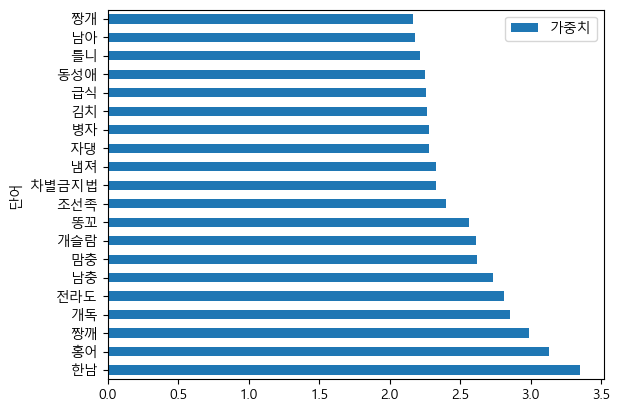

In [75]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
unsmile_df.head(20).set_index('단어').plot(kind='barh')